In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [6]:
clf

DecisionTreeClassifier(criterion='entropy')

In [7]:
X = data[['X_1', 'X_2']]
y = data.Y

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [9]:
clf

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

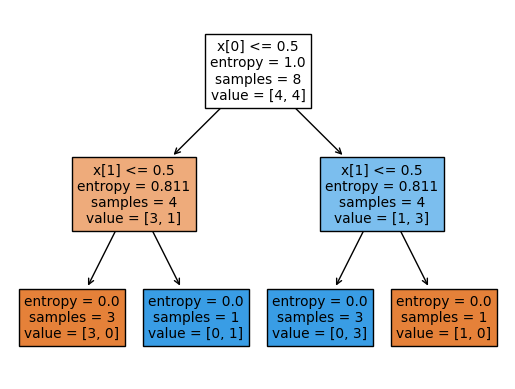

In [12]:
tree.plot_tree(clf, filled=True)

In [15]:
cats = pd.read_csv('data/cats.csv', index_col=0)

In [16]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [17]:
import scipy.stats as stats

In [24]:
cats['y'] = pd.Series([0,0,0,0,1,1,1,1,1,1])

In [25]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид,y
0,1,1,0,собачка,0
1,1,1,0,собачка,0
2,1,1,0,собачка,0
3,1,1,0,собачка,0
4,1,0,1,котик,1
5,1,0,1,котик,1
6,1,0,1,котик,1
7,1,0,1,котик,1
8,1,1,1,котик,1
9,0,0,1,котик,1


In [47]:
clf.fit(cats.iloc[:,[0]], cats.y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.75, 'x[0] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'entropy = 0.991\nsamples = 9\nvalue = [4, 5]')]

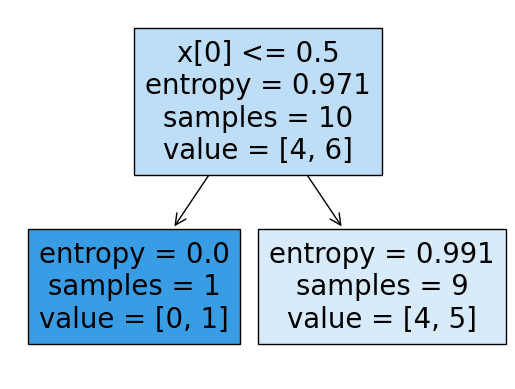

In [48]:
tree.plot_tree(clf, filled=True)

In [86]:
stats.entropy([4/10, 6/10], base=2)

0.9709505944546688

In [82]:
stats.entropy([4/10, 6/10], base=2) \
    - (1/10 * stats.entropy([0, 1], base=2) + 9/10 * stats.entropy([4/9, 5/9], base=2))

0.07898214060026876

In [84]:
stats.entropy([4/10, 6/10], base=2) \
    - (5/10 * stats.entropy([4/5, 1/5], base=2) + 5/10 * stats.entropy([0, 1], base=2))

0.6099865470109876

In [85]:
stats.entropy([4/10, 6/10], base=2) \
    - (4/10 * stats.entropy([0, 1], base=2) + 6/10 * stats.entropy([1, 0], base=2))

0.9709505944546688